In [1]:
# Jupyter notebooks have problems with imports from parent folder, so let's change the path
from jupyter_utils import change_path_to_parent
change_path_to_parent()

import matplotlib
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix

from datasets import get_dataset
from first_order import Adgd, AdgdAccel, Gd, Nesterov, Ogm, Polyak, RestNest
from loss import LogisticRegression

sns.set(style="whitegrid", context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['figure.figsize'] = (9, 6)

In [2]:
A, b = get_dataset('news20_class1')
loss = LogisticRegression(A, b, l1=0, l2=0)
n, dim = A.shape
L = loss.smoothness
l2 = 1e-5 * L
loss.l2 = l2
x0 = csc_matrix((dim, 1))
it_max = 2500

## Best accelerated method

In [3]:
nest = Nesterov(loss=loss, label='Nesterov')
nest2 = Nesterov(loss=loss, strongly_convex=True, mu=l2, label='Nesterov for str. convex')
rest = RestNest(loss=loss, label='Nesterov restarts grad')
rest2 = RestNest(loss=loss, func_condition=True, label='Nesterov restarts func')
rest3 = RestNest(loss=loss, doubling=True, label='Nesterov restarts doubling')
adgda = AdgdAccel(loss=loss, label='Accelerated AdGD')
ogm = Ogm(loss=loss, label='Optimized AGD')
ogm2 = Ogm(loss=loss, label='Optimized AGD for str. convex', strongly_convex=True, mu=l2)
accelerated_optimizers = [nest, nest2, rest, rest2, rest3, adgda, ogm, ogm2]
markers = [',', 'o', '^', '*', 'd', 's', 'X', 'P', '.', 6, 7]

Running optimizer: Nesterov
Running optimizer: Nesterov for str. convex
Running optimizer: Nesterov restarts grad
Running optimizer: Nesterov restarts func
Running optimizer: Nesterov restarts doubling
Running optimizer: Accelerated AdGD
Running optimizer: Optimized AGD
Running optimizer: Optimized AGD for str. convex


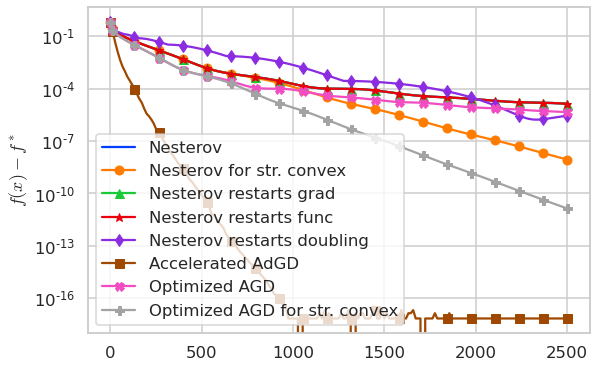

In [4]:
for opt in accelerated_optimizers:
    print(f'Running optimizer: {opt.label}')
    opt.run(x0=x0, it_max=it_max)
    opt.compute_loss_of_iterates()

for opt, marker in zip(accelerated_optimizers, markers):
    opt.trace.plot_losses(marker=marker)
plt.yscale('log')
plt.legend()

## Compare it with others

In [5]:
gd = Gd(loss=loss, label='GD')
adgd = Adgd(loss=loss, label='AdGD')
pol = Polyak(loss=loss, label='Polyak', f_opt=loss.f_opt)
optimizers = [gd, adgd, adgda, pol, ogm2]

Running optimizer: GD
Running optimizer: AdGD
Running optimizer: Accelerated AdGD
Loss values have already been computed. Set .loss_vals = [] to recompute
Running optimizer: Polyak
Running optimizer: Optimized AGD for str. convex
Loss values have already been computed. Set .loss_vals = [] to recompute


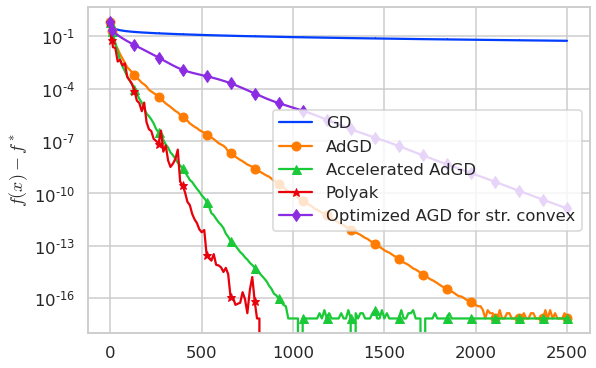

In [6]:
for opt in optimizers:
    print(f'Running optimizer: {opt.label}')
    opt.run(x0=x0, it_max=it_max)
    opt.compute_loss_of_iterates()

for opt, marker in zip(optimizers, markers):
    opt.trace.plot_losses(marker=marker)
plt.yscale('log')
plt.legend()